# Introducción

Una predicción desde un punto de vista de aprendizaje automático es un punto. Los intervalos de predicción proporcionan una forma de cuantificar y comunicar la incertidumbre en una predicción.

# Motivos para calcular un intervalo de predicción

Una predicción es un valor de salida dadas unas variables de entrada:

$$\bar{y} = model.predict(X)$$

Donde y es la estimación que nos proporciona un modelo entrenado por unas variables de entrada X. Por definición, esto es una estimación y por lo tanto contiene algún tipo de incertidumbre. Dicha incertidumbre proviene de errores en el propio modelo a la hora de predecir, como del ruido en los datos de entrada. El modelo es una aproximación de la relación entre las variables de entrada y las variables de salida.

Puesto que existen diferentes fuentes de errores a la hora de realizar una predicción, dar únicamente el valor de predicción, no es suficiente para cuantificar y describir la auténtica incertidumbre de la predicción.

# ¿Qué es un intervalo de predicción?

Un intervalo de predicción es una cuantificación de la incertidumbre en una predicción. Esto proporciona límites probibilísticos superiores e inferiores. Los intervalos de predicción son usados de forma muy común cuando se hacen uso de modelos cuyas predicciones son valores cuantificables, por ejemplo, modelos de regresión. Podemos definir un intervalo de predicción como: "dada una predicción **y** y dadas unas variables de entrada **X**, hay un 95% de probabilidad de que el rango [a,b] cubra la salida auténtica".

Un intervalo de predicción es diferente a un intervalo de confianza. Un intervalo de confianza cuantifica la incertidumbre de la estimación de una variable de la población, tal como la media o la desviación estándar. Sin embargo, un intervalo de predicción cuantifica la incertidumbre de una observación estimada.

En machine learning, un intervalo de confianza puede ser usado para describir o cuantificar la incertidumbre de la abilidad de un modelo, sin embargo, un intervalo de predicción puede ser usado para cuantificar la incertidumbre de una sola predicción. Un intervalo de predicción normalmente es más amplio que un intervalo de confianza, esto se debe a que los intervalos de predicción además del intervalo de confianza toman en consideración la varianza de la variable de salida.

# Cómo calcular un Intervalo de Predicción

Un intervalo de predicción es calculado como una combibación de la varianza estimada de el modelo y la varianza de la variable de salida. Son fáciles de describrir, pero difíciles de calcular. En casos simples como la regresión lineal, podemos estimar el intervalo de predicción de forma directa.

En el caso de algoritmos no lineales, tales como redes neuronales, requiere la implementación de técnicas especializadas. Técnicas generales como la técnica Bootstrap pueden ser utilizadas pero su coste computacional es muy costoso. Algunos de los métodos usados para algoritmos no lineales son:

* El método Delta, para el caso de una regresión no lineal.

* El método Bayesiano, a partir de modelización Bayesiana y estadística.

* Método de estimación media-varianza, haciendo uso de estimación estadística.

* Método Bootstrap, haciendo uso de remuestreo y desarrollando modelos ensemble.

# Intervalo de predicción para la Regresión Lineal

Una regresión lineal es un modelo que describe una variable de salida como una combinación lineal de variables de entrada.

$$\hat{y} = b_{0} + b_{1}x$$

Los verdaderos valores de estos coeficientes no pueden ser conocidos. Tampoco, es posible conocer los verdaderos valores de la media y la desviación estándar de la población x e y. Todos estos valores deben ser estimados, lo cual introduce incertidumbre a la hora de hacer predicciones.

Podemos realizar algunas asunciones, tales como que las distribuciones de x e y, y los errores de las predicciones del modelo, llamados residuos, son Gaussianos. El intervalo de predicción entorno al valor predicho puede ser calculado como

$$\hat{y}\pm z\times\sigma$$

Donde z es el valor crítico de la distribución Gaussiana (ejemplo 1,96 para un intervalo del 95%) y sigma es la desviación estándar de la distribución predicha. En la práctica no conocemos sigma, pero podemos calcular una estimación no sesgada de la desviación estándar prevista como

$$stdev = \sqrt{\frac{1}{n-2}\times\sum_{i = 1}^n(\hat{y_{i} - y_{i}})^2}$$

Donde stdev es una estimació no sesgada de la desviación estándar para la distribución predicha, n es el número total de predicciones realizadas.

# Ejemplo

A continuación vamos a proceder a realizar un ejemplo de un intervalo de predicción para el caso de un regresión lineal. Vamos a crear dos muestras, donde la muestra y dependerá de la muestra x con un ruido gaussiano de por medio.

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
import matplotlib.pyplot as plt

In [4]:
#Fijamos la semilla
seed(1)

#Generamos la variable x y la variable y
x = 20*randn(1000) + 100
y = x + (10*randn(1000) + 50)

#Vemos un resumen estadísticas de ambas variables
print('x: mean=%.3f stdv=%.3f' % (np.mean(x), np.std(x)))
print('y: mean=%.3f stdv=%.3f' % (np.mean(y), np.std(y)))

x: mean=100.776 stdv=19.620
y: mean=151.050 stdv=22.358


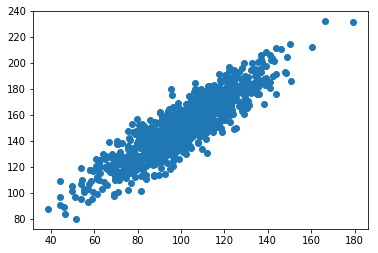

In [5]:
#Hacemos un plot de estados dos variables
plt.scatter(x,y)
plt.show()

A continuación vamos a proceder a hacer uso de la función **linregress()** de Scipy que nos retorna los coeficientes.

In [10]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import linregress
from matplotlib import pyplot
from numpy import sum as arraysum

In [7]:
#Obtenemos los coeficientes
b1, b0, r_value, p_value, std_err = linregress(x, y)
print('b0 = %.3f, b1=%.3f' % (b0,b1))

b0 = 49.117, b1=1.011


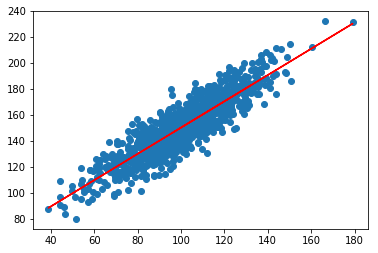

In [9]:
#Hacemos las predicciones y las representamos gráficamente
y_pred = b1*x + b0

plt.scatter(x,y)
plt.plot(x, y_pred, color = 'r')
plt.show()

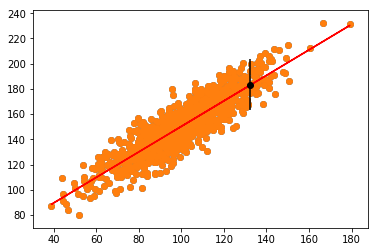

In [14]:
#Estimamos el intervalo de predicción para uno de los valores estimados
x_in = x[0]
y_out = y[0]
y_hat = y_pred[0]

#Estimamos la desviación estándar de nuestras predicciones
sum_errors = arraysum((y-y_pred)**2)
stdev = np.sqrt(1/(len(y)-2)*sum_errors)

#Calculamos el intervalo de predicción 
interval = 1.96*stdev

#Calculamos el intervalo de predicción para nuestra muestra seleccionada
lower, upper = y_hat-interval, y_hat+interval

#Vemos la representación gráfica
plt.scatter(x, y)
plt.plot(x, y_pred, color= 'red' )
plt.errorbar(x_in, y_hat, yerr=interval, color= 'black' , fmt= 'o' )
plt.show()

In [16]:
print('Con una probabilidad del 95%% el valor verdadero se encuentra entre %.3f y %.3f' % (lower, upper))

Con una probabilidad del 95% el valor verdadero se encuentra entre 162.920 y 203.328
